In [2]:
import cirq
import qsimcirq
# Define qubits and a short circuit.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.H(q0), cirq.CX(q0, q1))
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with Cirq and return the full state vector.
print('Cirq results:')
cirq_simulator = cirq.Simulator()
cirq_results = cirq_simulator.simulate(circuit)
print(cirq_results)
print()

# Simulate the circuit with qsim and return the full state vector.
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.simulate(circuit)
print(qsim_results)

Circuit:
0: ───H───@───
          │
1: ───────X───

Cirq results:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩

qsim results:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩


In [3]:
samples = cirq.sample_state_vector(
    qsim_results.state_vector(), indices=[0, 1], repetitions=10)
print(samples)

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [4]:
# Define a circuit with measurements.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H(q0), cirq.X(q1), cirq.CX(q0, q1),
    cirq.measure(q0, key='qubit_0'),
    cirq.measure(q1, key='qubit_1'),
)
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with Cirq and return just the measurement values.
print('Cirq results:')
cirq_simulator = cirq.Simulator()
cirq_results = cirq_simulator.run(circuit, repetitions=5)
print(cirq_results)
print()

# Simulate the circuit with qsim and return just the measurement values.
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.run(circuit, repetitions=5)
print(qsim_results)

Circuit:
0: ───H───@───M('qubit_0')───
          │
1: ───X───X───M('qubit_1')───

Cirq results:
qubit_0=10100
qubit_1=01011

qsim results:
qubit_0=00011
qubit_1=11100


In [5]:
# Define a circuit with intermediate measurements.
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.X(q0)**0.5, cirq.measure(q0, key='m0'),
    cirq.X(q0)**0.5, cirq.measure(q0, key='m1'),
    cirq.X(q0)**0.5, cirq.measure(q0, key='m2'),
)
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with qsim and return just the measurement values.
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.run(circuit, repetitions=5)
print(qsim_results)

Circuit:
0: ───X^0.5───M('m0')───X^0.5───M('m1')───X^0.5───M('m2')───

qsim results:
m0=10010
m1=00000
m2=01111


In [6]:
# Define a simple circuit.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.H(q0), cirq.CX(q0, q1))
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with qsim and return the amplitudes for |00) and |01).
print('Cirq results:')
cirq_simulator = cirq.Simulator()
cirq_results = cirq_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01])
print(cirq_results)
print()

# Simulate the circuit with qsim and return the amplitudes for |00) and |01).
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01])
print(qsim_results)

Circuit:
0: ───H───@───
          │
1: ───────X───

Cirq results:
[0.70710677+0.j 0.        +0.j]

qsim results:
[(0.7071067690849304+0j), 0j]


In [14]:
import time

# Get a rectangular grid of qubits.
qubits = cirq.GridQubit.rect(4, 5)

# Generates a random circuit on the provided qubits.
circuit = cirq.experiments.random_rotations_between_grid_interaction_layers_circuit(
    qubits=qubits, depth=66)

# Simulate the circuit with Cirq and print the runtime.
cirq_simulator = cirq.Simulator()
cirq_start = time.time()
cirq_results = cirq_simulator.simulate(circuit)
cirq_elapsed = time.time() - cirq_start
print(f'Cirq runtime: {cirq_elapsed} seconds.')
print()

# Simulate the circuit with qsim and print the runtime.
qsim_simulator = qsimcirq.QSimSimulator()
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

Cirq runtime: 14.127177238464355 seconds.

qsim runtime: 0.19808077812194824 seconds.


In [16]:
# Use eight threads to parallelize simulation.
options = {'t': 16}

qsim_simulator = qsimcirq.QSimSimulator(options)
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

qsim runtime: 0.10407352447509766 seconds.


In [17]:
# Increase maximum fused gate size to three qubits.
options = {'f': 3}

qsim_simulator = qsimcirq.QSimSimulator(options)
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

qsim runtime: 0.19913005828857422 seconds.


In [18]:
# Pick a pair of qubits.
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)

# Create a circuit that entangles the pair.
circuit = cirq.Circuit(
    cirq.H(q0), cirq.CX(q0, q1), cirq.X(q1)
)
print("Circuit:")
print(circuit)

Circuit:
(0, 0): ───H───@───────
               │
(0, 1): ───────X───X───


In [19]:
options = {}

# 'k' indicates the qubits on one side of the cut.
# We'll use qubit 0 for this.
options['k'] = [0]

# 'p' and 'r' control when values are assigned to cut indices.
# There are some intricacies in choosing values for these options,
# but for now we'll set p=1 and r=0.
# This allows us to pre-assign the value of the CX indices
# and distribute its execution to multiple jobs.
options['p'] = 1
options['r'] = 0

# 'w' indicates the value pre-assigned to the cut.
# This should change for each execution.
options['w'] = 0

# Create the qsimh simulator with those options.
qsimh_simulator = qsimcirq.QSimhSimulator(options)
results_0 = qsimh_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print(results_0)

[0j, (0.7071067690849304+0j), 0j, 0j]


In [20]:
options['w'] = 1

qsimh_simulator = qsimcirq.QSimhSimulator(options)
results_1 = qsimh_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print(results_1)

[0j, 0j, (0.7071067690849304+0j), 0j]


In [21]:
results = [r0 + r1 for r0, r1 in zip(results_0, results_1)]
print("qsimh results:")
print(results)

qsim_simulator = qsimcirq.QSimSimulator()
qsim_simulator.compute_amplitudes(circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print("qsim results:")
print(results)

qsimh results:
[0j, (0.7071067690849304+0j), (0.7071067690849304+0j), 0j]
qsim results:
[0j, (0.7071067690849304+0j), (0.7071067690849304+0j), 0j]


In [59]:
q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit(
    # Perform a Hadamard on both qubits
    cirq.H(q0), cirq.H(q1),
    # Apply amplitude damping to q0 with probability 0.1
    cirq.amplitude_damp(gamma=0.1).on(q0),
    # Apply phase damping to q1 with probability 0.1
    cirq.phase_damp(gamma=0.1).on(q1),
)

In [60]:
qsim_simulator = qsimcirq.QSimSimulator()
results = qsim_simulator.simulate(circuit)
print(results.final_state_vector)
print([i for i in results.final_state_vector])

[0.52631575+0.j 0.499307  +0.j 0.49930704+0.j 0.47368425+0.j]
[(0.52631575+0j), (0.499307+0j), (0.49930704+0j), (0.47368425+0j)]


In [61]:
# Simulate measuring at the end of the circuit.
measured_circuit = circuit + cirq.measure(q0, q1, key='m')
measure_results = qsim_simulator.run(measured_circuit, repetitions=5)
print(measure_results)

m=10100, 01110


In [62]:
# Calculate only the amplitudes of the |00) and |01) states.
amp_results = qsim_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01])
print(amp_results)

[(0.5263157486915588+0j), (0.4993070065975189+0j)]


In [64]:
# Set the "noisy repetitions" to 100.
# This parameter only affects expectation value calculations.
options = {'r': 1000}
# Also set the random seed to get reproducible results.
ev_simulator = qsimcirq.QSimSimulator(qsim_options=options, seed=1)
# Define observables to measure: <Z> for q0 and <X> for q1.
pauli_sum1 = cirq.Z(q0)
pauli_sum2 = cirq.X(q1)
# Calculate expectation values for the given observables.
ev_results = ev_simulator.simulate_expectation_values(
    circuit,
    observables=[pauli_sum1, pauli_sum2],
)
print(ev_results)

[(0.10947357293963432+0j), (0.9456875034570694+0j)]


In [68]:
qsim_simulator = qsimcirq.QSimSimulator()
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.bit_flip(p=0.5).on(q0),
    cirq.measure(q0, key='result')
)
result = qsim_simulator.run(circuit, repetitions=10000)
print(result.histogram(key='result'))

Counter({1: 5058, 0: 4942})


In [69]:
q0 = cirq.LineQubit(0)
# equivalent to cirq.bit_flip(p=0.2)
my_channel = cirq.MixedUnitaryChannel(
    [(0.8, cirq.unitary(cirq.I)), (0.2, cirq.unitary(cirq.X))],
    key='op_num',
)
circuit = cirq.Circuit(
    my_channel.on(q0),
    cirq.measure(q0, key='result')
)
result = cirq.Simulator(seed=0).run(circuit, repetitions=20)
# `op_num` and `result` are always equal.
print(result)

op_num=00001000001000000001
result=00001000001000000001


In [78]:
import numpy as np

q0 = cirq.LineQubit(0)
# equivalent to cirq.amplitude_damp(gamma=0.2)
gamma = 0.5
my_channel = cirq.KrausChannel(
    [
        np.array([[0, np.sqrt(gamma)], [0, 0]]),    # decay |1) -> |0)
        np.array([[1, 0], [0, np.sqrt(1-gamma)]]),  # stay in |1)
    ],
    key='op_num',
)
circuit = cirq.Circuit(
    cirq.X(q0),
    my_channel.on(q0),
    cirq.measure(q0, key='result')
)
result = cirq.Simulator(seed=0).run(circuit, repetitions=20)
# `op_num` and `result` are always equal.
print(result)

op_num=11001110011000100011
result=11001110011000100011


In [79]:
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.I(q0),
    cirq.measure(q0, key='result_0'),
    cirq.measure(q0, key='result_1'),
)
# Applies noise after every gate, even measurements.
noisy_circuit = circuit.with_noise(cirq.X)
print(noisy_circuit)
result = cirq.Simulator(seed=0).run(noisy_circuit, repetitions=20)
print("First measure:", result.histogram(key='result_0'))
print("Second measure:", result.histogram(key='result_1'))

0: ───I───X[cirq.VirtualTag()]───M('result_0')───X[cirq.VirtualTag()]───M('result_1')───X[cirq.VirtualTag()]───
First measure: Counter({1: 20})
Second measure: Counter({0: 20})


In [80]:
from cirq.devices import InsertionNoiseModel

q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.I(q0),
    cirq.X(q0),
    cirq.measure(q0, key='result'),
)
# Apply bitflip noise after each X gate.
target_op = cirq.OpIdentifier(cirq.XPowGate, q0)
insert_op = cirq.bit_flip(p=0.2).on(q0)
noise_model = InsertionNoiseModel(
    ops_added={target_op: insert_op},
    require_physical_tag=False,  # For use outside calibration-to-noise
)
noisy_circuit = circuit.with_noise(noise_model)
print(noisy_circuit)
result = cirq.Simulator(seed=0).run(noisy_circuit, repetitions=1000)
print(result.histogram(key='result'))

0: ───I───X───BF(0.2)───M('result')───
Counter({1: 795, 0: 205})


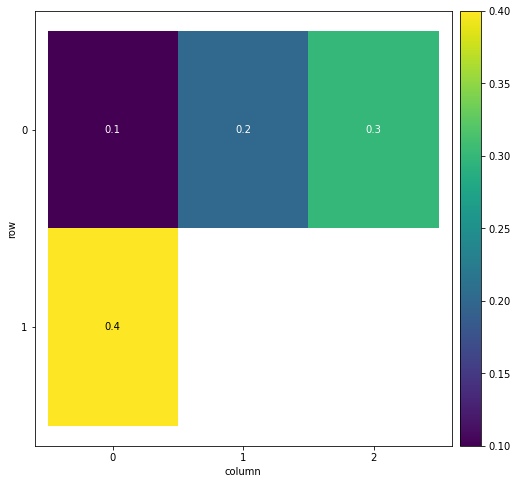

In [82]:
import matplotlib.pyplot as plt
single_qubit_heatmap = cirq.Heatmap({
    (cirq.GridQubit(0, 0),): 0.1,
    (cirq.GridQubit(0, 1),): 0.2,
    (cirq.GridQubit(0, 2),): 0.3,
    (cirq.GridQubit(1, 0),): 0.4,
})

_, ax = plt.subplots(figsize=(8, 8))
_ = single_qubit_heatmap.plot(ax)

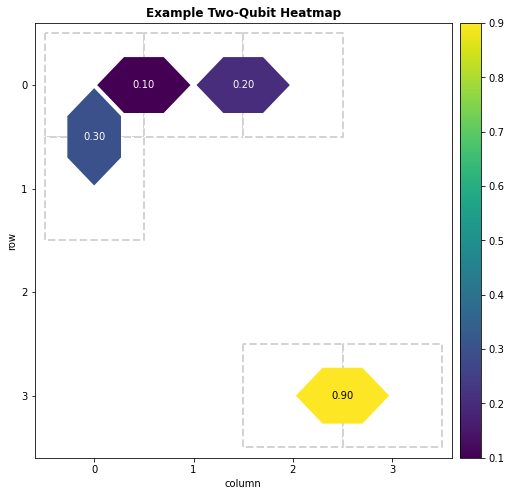

In [83]:
two_qubit_interaction_heatmap = cirq.TwoQubitInteractionHeatmap({
    (cirq.GridQubit(0, 0), cirq.GridQubit(0, 1)): 0.1,
    (cirq.GridQubit(0, 1), cirq.GridQubit(0, 2)): 0.2,
    (cirq.GridQubit(1, 0), cirq.GridQubit(0, 0)): 0.3,
    (cirq.GridQubit(3, 3), cirq.GridQubit(3, 2)): 0.9,
}, annotation_format="0.2f", title = 'Example Two-Qubit Heatmap')

_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax)

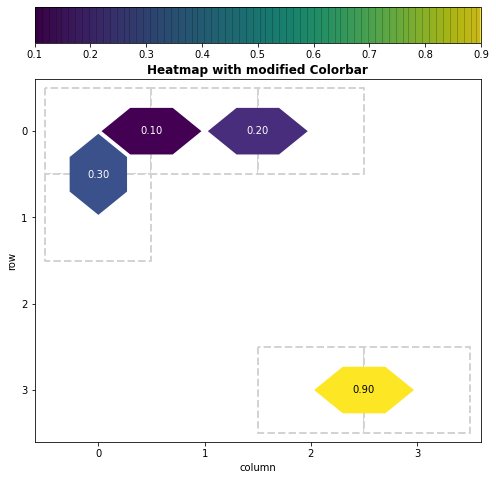

In [84]:
_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax,
                                       title = 'Heatmap with modified Colorbar',
                                       plot_colorbar = True,
                                       colorbar_position = 'top',
                                       colorbar_size = '10%',
                                       colorbar_pad = '10%',
                                       colorbar_options = {
                                           'drawedges' : True
                                       })

In [85]:
# Standard imports
import numpy as np

from cirq.contrib.svg import SVGCircuit

In [86]:
exponents = np.linspace(0, 7/4, 8)
exponents

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75])

In [87]:
import itertools
SINGLE_QUBIT_GATES = [
    cirq.PhasedXZGate(x_exponent=0.5, z_exponent=z, axis_phase_exponent=a)
    for a, z in itertools.product(exponents, repeat=2)
]
SINGLE_QUBIT_GATES[:10], '...'

([cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=0.0),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=0.25),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=0.5),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=0.75),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=1.0),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=1.25),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=1.5),
  cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.5, z_exponent=1.75),
  cirq.PhasedXZGate(axis_phase_exponent=0.25, x_exponent=0.5, z_exponent=0.0),
  cirq.PhasedXZGate(axis_phase_exponent=0.25, x_exponent=0.5, z_exponent=0.25)],
 '...')

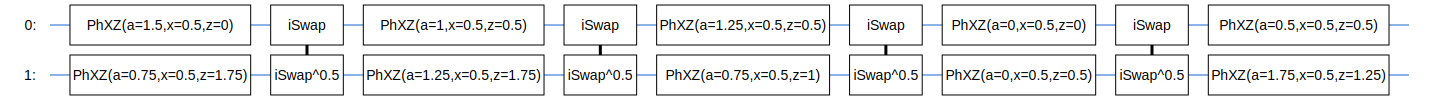

In [88]:
import cirq_google as cg
from cirq.experiments import random_quantum_circuit_generation as rqcg

q0, q1 = cirq.LineQubit.range(2)
circuit = rqcg.random_rotations_between_two_qubit_circuit(
    q0, q1, 
    depth=4, 
    two_qubit_op_factory=lambda a, b, _: cirq.SQRT_ISWAP(a, b), 
    single_qubit_gates=SINGLE_QUBIT_GATES
)
SVGCircuit(circuit)

In [89]:
# Make long circuits (which we will truncate)
MAX_DEPTH = 100
N_CIRCUITS = 10
circuits = [
    rqcg.random_rotations_between_two_qubit_circuit(
        q0, q1, 
        depth=MAX_DEPTH, 
        two_qubit_op_factory=lambda a, b, _: cirq.SQRT_ISWAP(a, b), 
        single_qubit_gates=SINGLE_QUBIT_GATES)
    for _ in range(N_CIRCUITS)
]

In [90]:
# We will truncate to these lengths
cycle_depths = np.arange(1, MAX_DEPTH + 1, 9)
cycle_depths

array([  1,  10,  19,  28,  37,  46,  55,  64,  73,  82,  91, 100])

In [91]:
pure_sim = cirq.Simulator()

# Pauli Error. If there is an error, it is either X, Y, or Z
# with probability E_PAULI / 3
E_PAULI = 5e-3
noisy_sim = cirq.DensityMatrixSimulator(noise=cirq.depolarize(E_PAULI))

# These two qubit circuits have 2^2 = 4 probabilities
DIM = 4

records = []
for cycle_depth in cycle_depths:
    for circuit_i, circuit in enumerate(circuits):

        # Truncate the long circuit to the requested cycle_depth
        circuit_depth = cycle_depth * 2 + 1
        assert circuit_depth <= len(circuit)
        trunc_circuit = circuit[:circuit_depth]

        # Pure-state simulation
        psi = pure_sim.simulate(trunc_circuit).final_state_vector
        pure_probs = np.abs(psi)**2

        # Noisy execution
        meas_circuit = trunc_circuit + cirq.measure(q0, q1)
        sampled_inds = noisy_sim.sample(meas_circuit, repetitions=10_000).values[:,0]
        sampled_probs = np.bincount(sampled_inds, minlength=DIM) / len(sampled_inds)

        # Save the results
        records += [{
            'circuit_i': circuit_i,
            'cycle_depth': cycle_depth,
            'circuit_depth': circuit_depth,
            'pure_probs': pure_probs,
            'sampled_probs': sampled_probs,
        }]
        print('.', end='', flush=True)

........................................................................................................................

In [92]:
from cirq.experiments import random_quantum_circuit_generation as rqcg

RANDOM_SEED = np.random.RandomState(53)

circuit_library = rqcg.generate_library_of_2q_circuits(
    n_library_circuits=20, two_qubit_gate=cirq.SQRT_ISWAP, random_state=RANDOM_SEED
)
max_depth = 100
cycle_depths = np.arange(3, max_depth, 20)

In [93]:
# build sqrt_iswap gate from a phased fsim gate
sqrt_iswap_as_phased_fsim = cirq.PhasedFSimGate.from_fsim_rz(
    theta=-np.pi / 4, phi=0, rz_angles_before=(0, 0), rz_angles_after=(0, 0)
)

# check that the unitaries are the same
np.testing.assert_allclose(
    cirq.unitary(sqrt_iswap_as_phased_fsim), cirq.unitary(cirq.SQRT_ISWAP), atol=1e-8
)

In [94]:
from collections import defaultdict

phi_angles = defaultdict(lambda: RANDOM_SEED.uniform(low=0, high=2 / 16 * np.pi))


def _sub_iswap(op):
    if op.gate == cirq.SQRT_ISWAP:
        # add coherent error to the phi angle while creating a sqrt iswap gate
        perturbed_sqrt_iswap = cirq.PhasedFSimGate.from_fsim_rz(
            theta=-np.pi / 4,
            phi=phi_angles[op.qubits],
            rz_angles_before=(0, 0),
            rz_angles_after=(0, 0),
        )

        return perturbed_sqrt_iswap.on(*op.qubits)
    return op

In [96]:
from typing import Sequence


class FusedNoiseModel(cirq.NoiseModel):
    """A noise model that applies other noise models in sequence"""

    def __init__(self, models: Sequence[cirq.NoiseModel]):
        self.models = models

    def noisy_moment(self, moment: 'cirq.Moment', system_qubits: Sequence['cirq.Qid']):
        """Produce a list of moments by applying each model in sequence to the available moments"""

        moments = [moment]
        for model in self.models:
            new_moments = []
            for moment in moments:
                ret = model.noisy_moment(moment, system_qubits)
                # handle constituent noise models returning lists of or singleton moments
                new_moments.extend([ret] if isinstance(ret, cirq.Moment) else ret)
            moments = new_moments
        return moments

In [97]:
# create noise models
coherent_noise = cirq.devices.noise_model.GateSubstitutionNoiseModel(_sub_iswap)
incoherent_noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(5e-3))
noiseless = None
fused_noise = FusedNoiseModel([coherent_noise, incoherent_noise])

# create samplers by passing noise models to simulator constructor
coherent_sampler = cirq.DensityMatrixSimulator(noise=coherent_noise)
incoherent_sampler = cirq.DensityMatrixSimulator(noise=incoherent_noise)
noiseless_sampler = cirq.DensityMatrixSimulator(noise=noiseless)
fused_sampler = cirq.DensityMatrixSimulator(noise=fused_noise)

# from here on out, all experiment steps will be performed on
#   samplers and their results in the following order.
samplers = [coherent_sampler, incoherent_sampler, noiseless_sampler, fused_sampler]
noise_titles = ['Coherent', 'Incoherent', 'Noiseless', 'Fused']

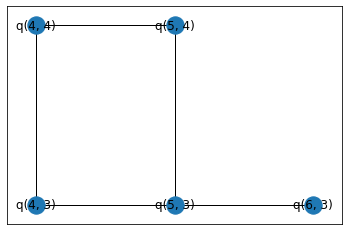

In [108]:
import networkx as nx
import itertools

# a set of six example GridQubits
qubits = cirq.GridQubit.rect(3, 2, 4, 3)
# only use the first num_qubits many qubits
num_qubits = 5
qubits = qubits[:num_qubits]

# create graph from adjacent qubits
graph = nx.Graph((q1, q2) for (q1, q2) in itertools.combinations(qubits, 2) if q1.is_adjacent(q2))
pos = {q: (q.row, q.col) for q in qubits}
nx.draw_networkx(graph, pos=pos)

In [99]:
combs_by_layer = rqcg.get_random_combinations_for_device(
    n_library_circuits=len(circuit_library),
    n_combinations=10,
    device_graph=graph,
    random_state=RANDOM_SEED,
)

In [109]:
import cirq.experiments.xeb_sampling as xeb_sampling
import cirq.experiments.xeb_fitting as xeb_fitting

# use the same circuit library, cycle depths, combinations by layer,
#   random seed and repetitions for both noise models' samplers.
def sample_df(sampler):
    return xeb_sampling.sample_2q_xeb_circuits(
        sampler=sampler,
        circuits=circuit_library,
        cycle_depths=cycle_depths,
        combinations_by_layer=combs_by_layer,
        shuffle=RANDOM_SEED,
        repetitions=1000,
    )


sampled_dfs = list(map(sample_df, samplers))

100%|██████████| 207/207 [00:35<00:00,  5.81it/s]


In [110]:
# use the same circuit library and cycle_depths for both
#   noise models' sampled data.
def estimate_fidelities(sampled_df):
    return xeb_fitting.benchmark_2q_xeb_fidelities(
        sampled_df=sampled_df, circuits=circuit_library, cycle_depths=cycle_depths
    )


circuit_fidelities = list(map(estimate_fidelities, sampled_dfs))

In [111]:
fitted_fidelities = list(map(xeb_fitting.fit_exponential_decays, circuit_fidelities))

C:\Users\wdc\AppData\Local\Temp\ipykernel_8124\4251997075.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


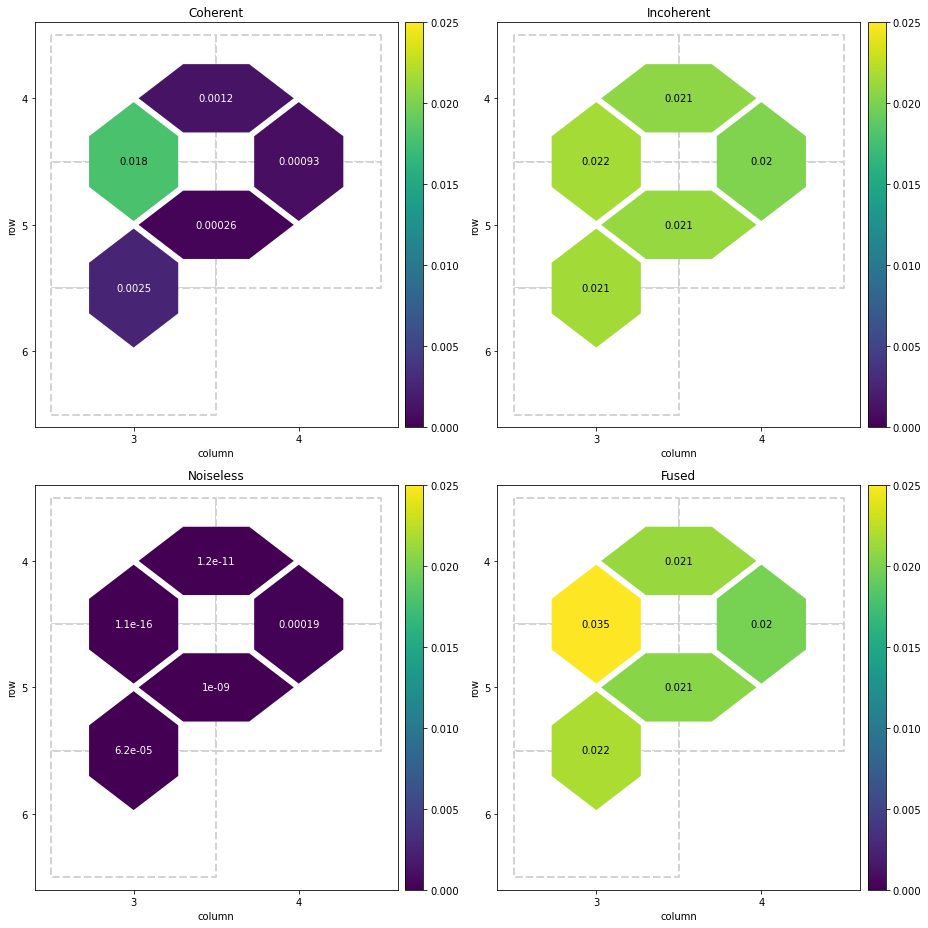

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(13, 13))
for fidelities, ax, title in zip(fitted_fidelities, axes.flat, noise_titles):
    # pull out the by-layer/cycle fidelity and turn it into error with 1-fidelity.
    heatmap_data = {
        pair: (1.0 - layer_fid) for ((_, _, pair), layer_fid) in fidelities.layer_fid.items()
    }
    cirq.TwoQubitInteractionHeatmap(heatmap_data, vmin=0, vmax=0.025).plot(ax)

    ax.set_title(title)

fig.tight_layout()
fig.show()

In [113]:
import cirq
import numpy as np

class QutritPlusGate(cirq.Gate):
    """A gate that adds one in the computational basis of a qutrit.

    This gate acts on three-level systems. In the computational basis of
    this system it enacts the transformation U|x〉 = |x + 1 mod 3〉, or
    in other words U|0〉 = |1〉, U|1〉 = |2〉, and U|2> = |0〉.
    """

    def _qid_shape_(self):
        # By implementing this method this gate implements the
        # cirq.qid_shape protocol and will return the tuple (3,)
        # when cirq.qid_shape acts on an instance of this class.
        # This indicates that the gate acts on a single qutrit.
        return (3,)

    def _unitary_(self):
        # Since the gate acts on three level systems it has a unitary 
        # effect which is a three by three unitary matrix.
        return np.array([[0, 0, 1],
                         [1, 0, 0],
                         [0, 1, 0]])

    def _circuit_diagram_info_(self, args):
        return '[+1]'

# Here we create a qutrit for the gate to act on. 
q0 = cirq.LineQid(0, dimension=3)

# We can now enact the gate on this qutrit.
circuit = cirq.Circuit(
    QutritPlusGate().on(q0)
)

# When we print this out we see that the qutrit is labeled by its dimension.
print(circuit)

0 (d=3): ───[+1]───


In [114]:
# Create an instance of the qutrit gate defined above.
gate = QutritPlusGate()

# Verify that it acts on a single qutrit.
print(cirq.qid_shape(gate))

(3,)


In [115]:
# Create an instance of the qutrit gate defined above. This gate implements _unitary_.
gate = QutritPlusGate()

# Because it acts on qutrits, its unitary is a 3 by 3 matrix.
print(cirq.unitary(gate))

[[0 0 1]
 [1 0 0]
 [0 1 0]]


In [116]:
# Create a circuit from the gate we defined above.
q0 = cirq.LineQid(0, dimension=3)
circuit = cirq.Circuit(QutritPlusGate()(q0))

# Run a simulation of this circuit.
sim = cirq.Simulator()
result = sim.simulate(circuit)

# Verify that the returned state is that of a qutrit.
print(cirq.qid_shape(result))

(3,)


In [124]:
# Create a circuit with three qutrit gates.
q0, q1 = cirq.LineQid.range(2, dimension=3)
circuit = cirq.Circuit([
    QutritPlusGate()(q0), 
    QutritPlusGate()(q1),
    QutritPlusGate()(q1),
    cirq.measure(q0, q1, key='x')
])

# Sample from this circuit.
result = cirq.sample(circuit, repetitions=3)

# See that the results are all integers from 0 to 2.
print(result)

x=111, 222


In [135]:
result.measurements

{'x': array([[1, 2],
        [1, 2],
        [1, 2]], dtype=int8)}